
"""
Created on Mon Sep 19 16:57:47 2016 | modified & converted to notebook

@author: hrm

Exploring MTA Turnstile Data

%% Refs
http://web.mta.info/developers/turnstile.html
https://data.ny.gov/Transportation/NYC-Transit-Subway-Entrance-And-Exit-Data/i9wp-a4ja/data
https://spatialityblog.com/2010/07/08/mta-gis-data-update/


%% Pandas
http://pythonhow.com/accessing-dataframe-columns-rows-and-cells

"""


In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Make into Function -- load list of url data
# urlList = ["http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt",
#            "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt",
#            "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt",
#            "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt",
#            "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt",
#            "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt",
#            "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt",
#            "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt",
#            "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt"]

#len(urlList)=9

# import pandas as pd
# #http://pandas.pydata.org/pandas-docs/stable/merging.html

# cnt=0
# for u in urlList:
#     Dtmp = pd.read_csv(u)
#     if cnt==0:
#         Dmat = Dtmp
#     else:
#         Dmat = pd.concat([Dmat, Dtmp])
#     cnt += 1

# del Dtmp

# D= Dmat

In [2]:
import pandas as pd

#url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt"
url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt"
D = pd.read_csv(url,na_values=['.', 0])
#print(D)
#D.head

#D.columns
#Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME','DESC', 'ENTRIES','EXITS'], dtype='object')

In [197]:
import dateutil.parser as DUparser
from collections import defaultdict

Ddict = defaultdict(list)
for row in D.values:
    ca = row[0]
    unit = row[1]
    scp = row[2]
    station = row[3]
    linename = row[4]
    division = row[5]
    date = row[6]
    #date_wday = DUparser.parse(date).weekday()
    time = row[7]
    desc = row[8]
    entries = row[9]
    exits = row[10]

##    Ddict[(ca, unit, scp, station)].append([DUparser.parse(date + " " + time), date_wday, int(entries) ]) #,  int(exits)])

#     Ddict[(ca, unit, scp, station)].append([DUparser.parse(date + " " + time), int(entries) ]) #,  int(exits)])

    Ddict[(ca, unit, scp, station, linename)].append([DUparser.parse(date + " " + time), int(entries) ])



In [ ]:
#==============================================================================
# some time interval [0,4,8,12,16,20,(0)]+1 discrepancies over daylight savings but also sampling times.
# however, if we take day differences in the list of commuter vol/flow count data, this might not be an issue -- day+1[0] - day[0] || or Count_8/9pm - Count_4/8am? || TimeInt[5or-1] - TimeInt[1]

#https://pymotw.com/3/datetime/

#http://travel.mtanyct.info/serviceadvisory/

#==============================================================================

In [198]:
## Count Passenger Vol by Station-Unit_SCP
import numpy as np

Sdict = defaultdict(list)

for key in Ddict:
# new dict with station identifier as key and all entry/exit counts as list of values
    tmpHdict = defaultdict(list)

    for tf in Ddict[key]:
        DateTime= tf[0]
        #wday = tf[1]
        volume = tf[1]

        tmpHdict[DateTime.date()].append(volume)
#        break
#        print(tmpTdict)

        ## get difference between relevant highest(latest | 8/9pm) & lowest (earliest | 4/5am) index of count of the day
    tmpCdict = defaultdict(list)
    for date in tmpHdict.keys():
#        print (date)
        #count = max(tmpTdict[date]) - min(tmpTdict[date])
        if (len(tmpHdict[date])>=2):
            count = tmpHdict[date][len(tmpHdict[date])-1] - tmpHdict[date][1]            
        else:
            count = [0]

        # tmpCdict[date].append([date.weekday(),count])
        tmpCdict[date.weekday()].append(count)
        
    if np.all(np.array(list(tmpCdict.values()))>0)==True:
        #Sdict[key]= tmpCdict
        if np.all(np.array(list(tmpCdict.values()))<6000000)==True:  # reasonable counts per week 
            Sdict[key]= tmpCdict

#Sdict

In [164]:
# 5000*16 #*7 #560000

In [217]:
# Sdict

In [ ]:
# list(Sdict.values())[0]

In [163]:
# import numpy as np
# test=np.array(list(list(Sdict.values())[0].values()))
# test
# np.all(test>0)

In [207]:
## Cluster Count Passenger Vol by Station

#DC = {(keys[0],keys[1],keys[3]): values for keys, values in Sdict.items() }


#pd.DataFrame(Sdict[list(Sdict.keys())[0]])
#pd.DataFrame(Sdict[list(Sdict.keys())[1]])
#pd.concat([])

SNdict0 = defaultdict(list)
SNdict = defaultdict(list)

for key in Sdict:
# new dict with stationName (+2other) identifier as key and all entry/exit counts as list of values
#    print key
#    print
    #SNdict0[key[0],key[1],key[3]].append( pd.DataFrame(Sdict[key]) )
    SNdict0[key[3],key[4]].append( pd.DataFrame(Sdict[key]) )
    SNdict[key[3]].append( pd.DataFrame(Sdict[key]) )


In [138]:
# pd.concat(SNdict[list(SNdict.keys())[0]])

In [83]:
# np.sum(list(pd.concat(SNdict[list(SNdict.keys())[0]]).sum()))


39566

In [208]:
StatFlowDict = defaultdict(list)

for key in SNdict:
    StatFlowDict[key] =  np.sum(list(pd.concat(SNdict[key]).sum())) 

StatFlowDict0 = defaultdict(list)    
for key in SNdict0:    
    StatFlowDict0[key] =  np.sum(list(pd.concat(SNdict0[key]).sum())) 


In [154]:
# StatFlowDict

In [215]:
# StatFlowDF.plot()

In [250]:
StatFlowDF = pd.DataFrame(list(StatFlowDict.items()))

In [249]:
# StatFlowDF.sort_values(by=1)
StatFlowDF.sort_values(by=0)

,0,1
167,1 AV,122765.0
73,103 ST,165983.0
173,103 ST-CORONA,118899.0
265,104 ST,25321.0
100,110 ST,81240.0
118,111 ST,92639.0
315,116 ST,182364.0
27,116 ST-COLUMBIA,97091.0
168,121 ST,14017.0
323,125 ST,419436.0


In [216]:
# StatFlowDF.describe()

In [265]:
# StatFlowDF = pd.DataFrame(list(StatFlowDict.items()))
StatFlowDF2 = pd.Series(StatFlowDict, name = 'DateValue')

StatFlowDF2.to_csv('StatFlowDF2.csv')

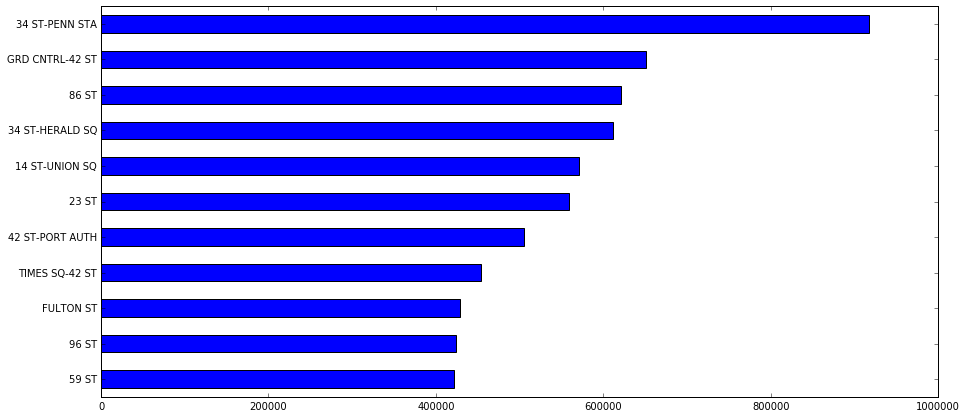

In [259]:
plt.figure(figsize=(15,7))
# plt.figure()
# StatFlowDF2.nlargest(15).plot(kind='bar')
df = StatFlowDF2.sort_values(ascending=False)
ax = df.iloc[:11].plot(kind="barh")
ax.invert_yaxis()

In [266]:
StatFlowDF02 = pd.Series(StatFlowDict0, name = 'DateValue')

StatFlowDF02.to_csv('StatFlowDF02_lines.csv')

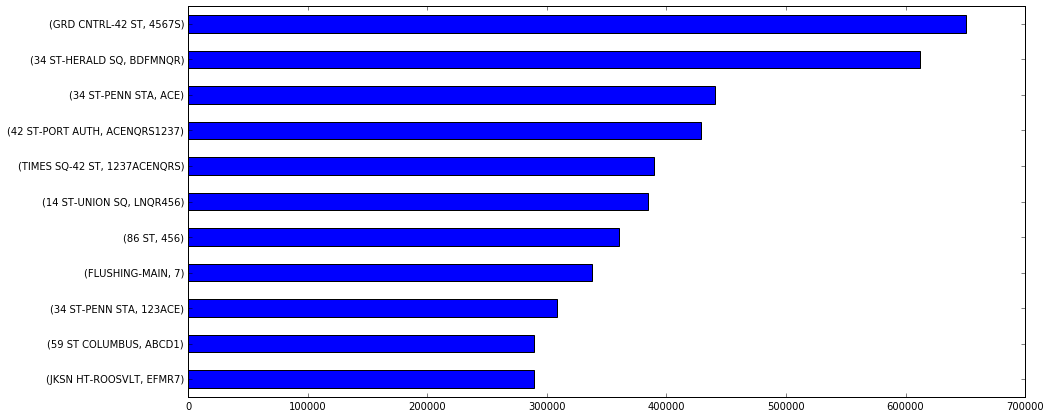

In [260]:
plt.figure(figsize=(15,7))
# StatFlowDF02.nlargest(15).plot(kind='bar')
df = StatFlowDF02.sort_values(ascending=False)
ax = df.iloc[:11].plot(kind="barh")
ax.invert_yaxis()


In [267]:
# StatFlowDF02

In [ ]:
StatFlowDF02[:,0].sort_values

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(range(num), [sunday_entries[i] for i in sort_perm[:num]])
plt.title("Total Entries from 10/18/2014 to 01/24/2015", size=25)
plt.xticks([x + 0.8 for x in range(num)],[stations[i] for i in sort_perm[:num]], size=15, rotation=25, horizontalalignment= 'right');
plt.ylabel("Total riders in 10s of millions", size=16);